
[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
DTW distance: 519745.21 meters
Warping path indices: [(np.int64(0), np.int64(0)), (np.int64(1), np.int64(1)), (np.int64(2), np.int64(2))]
DTW similarity score: 0.0000


<Figure size 1000x600 with 0 Axes>

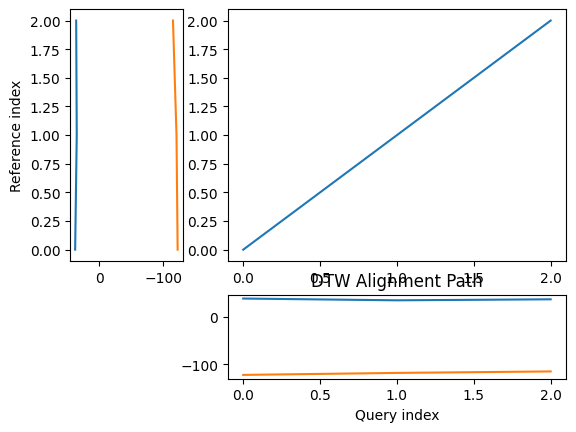

In [2]:
# Install required packages if needed
!pip install dtw-python haversine numpy matplotlib

import numpy as np
from dtw import dtw
from haversine import haversine
import matplotlib.pyplot as plt

# Sample GNSS trace data (latitude, longitude)
trace1 = [
    (37.7749, -122.4194),  # San Francisco
    (34.0522, -118.2437),  # Los Angeles
    (36.1699, -115.1398)   # Las Vegas
]

trace2 = [
    (37.7749, -122.4194),  # San Francisco
    (35.2828, -120.6596),  # Central Coast
    (36.1699, -115.1398)   # Las Vegas
]

# Haversine distance function for DTW
def gnss_distance(x, y):
    """Calculate distance between two (lat, lon) points in meters."""
    return haversine((x[0], x[1]), (y[0], y[1]), unit='m')

# Convert to numpy arrays
trace1_arr = np.array(trace1)
trace2_arr = np.array(trace2)

# Compute DTW
alignment = dtw(
    trace1_arr,
    trace2_arr,
    dist_method=gnss_distance,  # Use the correct parameter
    keep_internals=True
)

# DTW distance (dissimilarity)
dtw_distance = alignment.distance

# Warping path (indices of matched points)
warping_path = list(zip(alignment.index1, alignment.index2))

# Similarity score (higher = more similar, range 0-1)
similarity_score = 1 / (1 + dtw_distance)

# Output results
print(f"DTW distance: {dtw_distance:.2f} meters")
print(f"Warping path indices: {warping_path}")
print(f"DTW similarity score: {similarity_score:.4f}")

# Visualization
plt.figure(figsize=(10, 6))
alignment.plot(type="threeway")
plt.title("DTW Alignment Path")
plt.show()
